<a href="https://colab.research.google.com/github/abhijit49/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corportaion (Apple Inc.) using the past 60 day stock price

In [151]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [152]:
# Define symbol and desired date range
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = today

# Retrieve historical data
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Access data (example: closing prices)
closing_prices = df["Close"]

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639431,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700


In [153]:
#Get the number of rows and columns in the dataset
df.shape

(3065, 6)

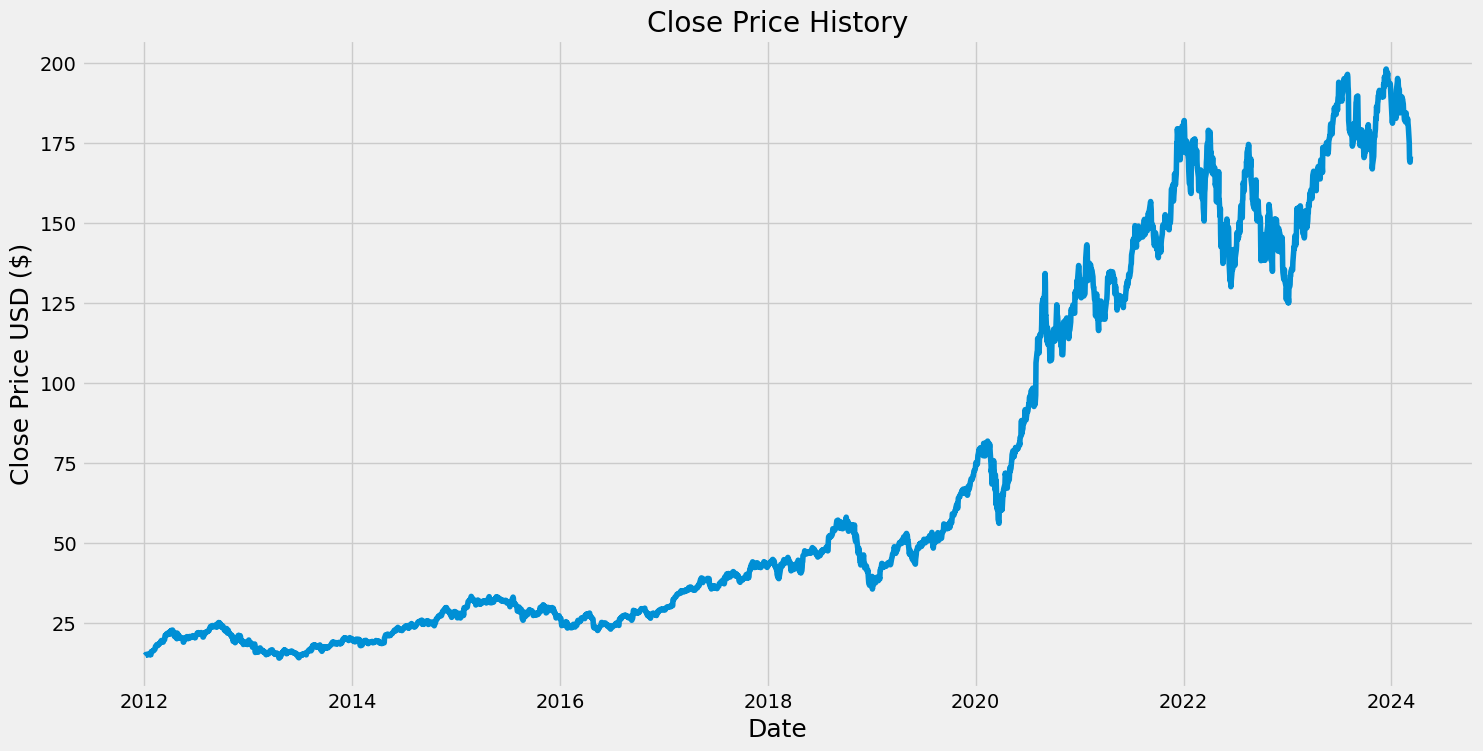

In [154]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [155]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2452

In [156]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84258464],
       [0.84193307],
       [0.85132693]])

In [157]:
#Create the training dataset
#Create he scaled training dataset
train_data=  scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train
x_train = []  #independent training variables or training features
y_train = []  #dependent training variables or training features

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=62:
    print(x_train)
    print(y_train)
    print()


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [158]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [159]:
#Reshape the data in to 3D from 2D
x_train =  np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2392, 60, 1)

In [160]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [161]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [162]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
#One epoch means that each sample in the training dataset
#has had an opportunity to update the internal model parameters.
#Generally, a number of 11 epochs is ideal for training on most datasets.

2392/2392 [==============================] - 93s 37ms/step - loss: 5.8804e-04


In [163]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the datasets x_test and y_tests
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [164]:
#Convert the data to a numpy array
x_test =np.array(x_test)

In [165]:
#Reshape the data
x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [166]:
#Get the models predicted price values
predictions =  model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 1s 17ms/step


In [167]:
#Get the root mean squared error (RMSE)
rmse =np.sqrt( np.mean(predictions - y_test)**2 )
rmse

6.560959422374433

<ipython-input-168-9fe5be920664>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


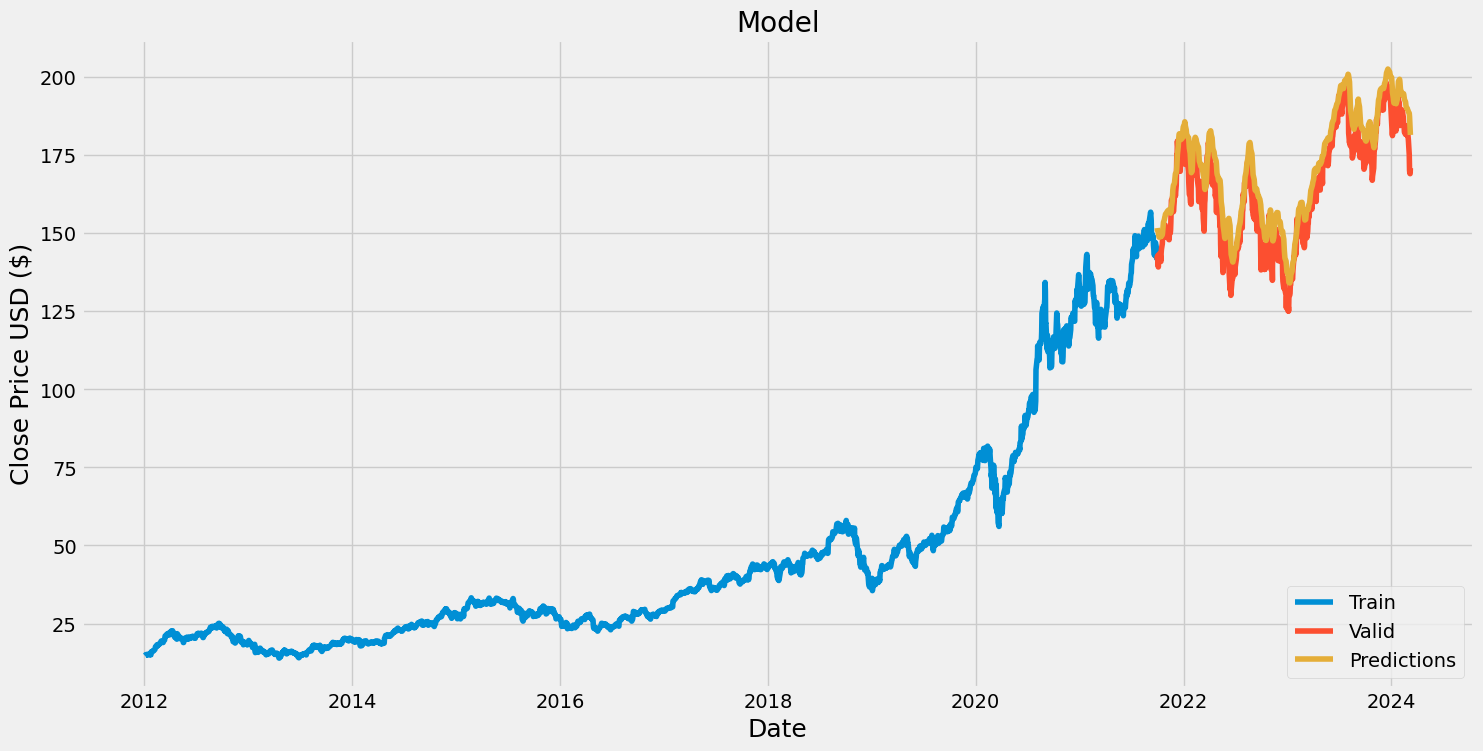

In [168]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid','Predictions'], loc='lower right')
plt.show()

In [169]:
#show the valid and the predicted price
valid

,Close,Predictions
Date,,
2021-09-30,141.500000,151.603867
2021-10-01,142.649994,150.912247
2021-10-04,139.139999,150.406937
2021-10-05,141.110001,149.577881
2021-10-06,142.000000,148.981491
...,...,...
2024-03-04,175.100006,188.360229
2024-03-05,170.119995,187.295105
2024-03-06,169.119995,185.440460


In [170]:
from re import X
#Get the quote
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = datetime(2019,12,18)

# Retrieve historical data
new_df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date).filter(['Close'])

#Get the last 60 day closing price values and convert the dateframe to an array
last_60_days =  new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 26ms/step
[[69.626724]]


In [173]:
new_df = pdr.get_data_yahoo(symbol, start=datetime(2024,3,1), end=datetime(2024,3,16)).filter(['Close'])
print(new_df)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2024-03-01  179.660004
2024-03-04  175.100006
2024-03-05  170.119995
2024-03-06  169.119995
2024-03-07  169.000000
2024-03-08  170.729996


In [126]:
#SPY = yf.download('AAPL', start='1995-1-1')
#SPY

In [127]:
#data = web.DataReader("AAPL", data_source= "yahoo", start = datetime(2023,1,1), end = datetime(2024,3,10))